### Gerenciamento do diretório do projeto

In [1]:
import sys
import os
script_dir = os.getcwd() # coleata o diretorio do projeto atual
sys.path.append(script_dir)

### Imports necessários para realizar a análise dos dados e plotagem de gráfico

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Carregando a base de dados que contém tanto o enunciado quando as alternativas em uma única String

In [3]:
csvdata = pd.read_csv(r'CSV\tudo_junto.csv')

`areas_number` é a uma variável simples, que cálcula a quantidade de classificações a partir da base de dados de input

In [4]:
Valor_areas_real = csvdata['Area_de_Conhecimento']
areas = Valor_areas_real.unique()
areas_number = len(areas)
areas_number

4

A partir da variável anterior, gera-se `possibilidades`, que em termos práticos, pega a quantidade de classificações descoberta anteriormente e gera um índice pra cada uma.

In [5]:
possibilidades = [x for x in range(areas_number)]
possibilidades

[0, 1, 2, 3]

A base de dados contém as respostas dadas pelo Gemini e salva anteriormente em `lista_1a1.pkl` agora é carregada e sakva na variável `data`.

In [6]:
with open('lista_enum_1a1_pp.pkl', 'rb') as file:
    data = pickle.load(file)

`final_data_resultado` recebe o resultado contido em `data`.

Esse tratamento é necessário devido a aparição de "\n" nos valores de `data`, agora os valores de `final_data_resultado` será apenas uma lista de Strings com apenas números ou None.

PS.: "None" representa uma resposta fora do conjunto inicial de classificações, será tratada como alucinação do modelo posteriormente.

In [7]:
final_data_resultado = []

for x in data:
    try:
        # Verifica se o objeto 'x' possui partes válidas
        if x.parts:
            # Acessa o texto da primeira parte
            final_data_resultado.append(x.parts[0].text)
        else:
            print("Nenhuma parte válida encontrada.")
            final_data_resultado.append(None)  # Adiciona None se não houver partes válidas
    except ValueError as e:
        print(f"Erro ao acessar o texto: {e}")
        final_data_resultado.append(None)  # Adiciona None se ocorrer um erro de valor

# final_data agora conterá o texto extraído ou None para entradas problemáticas


Nenhuma parte válida encontrada.
Nenhuma parte válida encontrada.


A função `return_list` trata nossa base de respostas do Gemini, retornando uma lista onde as alucinações agora são chamadas de "4"

In [8]:
def return_list(lista_strings):
    lista_retorno = []
    for x in lista_strings:
        if x is not None and int(x[0]) in possibilidades:
            lista_retorno.append(int(x[0]))
        else:
            lista_retorno.append(4)
    return lista_retorno

In [9]:
final_data_resultado = np.array(return_list(final_data_resultado))

Essa label é responsável por separar a quantidade encontrada por cada classificação.

In [10]:
# Obter valores únicos e suas contagens
unique_items, counts = np.unique(final_data_resultado, return_counts=True)

# Converter para lista, se necessário
unique_items_list = unique_items.tolist()
counts_list = counts.tolist()

# Imprimir os itens únicos e suas quantidades
for item, count in zip(unique_items_list, counts_list):
    print(f"Item: {item}, Quantidade: {count}")

Item: 0, Quantidade: 199
Item: 1, Quantidade: 202
Item: 2, Quantidade: 197
Item: 3, Quantidade: 192
Item: 4, Quantidade: 2


## Plotagem de Gráficos

### Plotagem de gráfico de distribuição de respostas

Esse gráfico é responsável por mostrar a quantidade de respostas em função das classificaçãoes previstas.

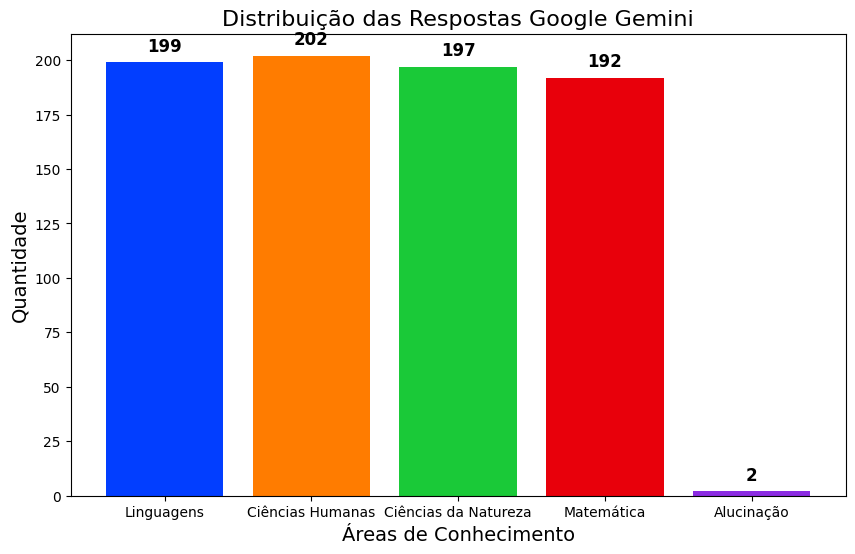

In [11]:
# Gerar uma paleta de cores brilhantes
colors = sns.color_palette("bright")

areas = areas.tolist()
areas.append("Alucinação")


# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(areas, counts_list, color=colors[:5])

# Adicionar títulos e rótulos
plt.title('Distribuição das Respostas Google Gemini', fontsize=16)
plt.xlabel('Áreas de Conhecimento', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

# Mostrar os valores acima de cada barra
for i, count in enumerate(counts_list):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12, fontweight = 'bold')

# Exibir o gráfico
plt.show()


O código mapeia os rótulos em `Valor_areas_real` para seus índices na lista `areas`. Ele percorre cada rótulo em `Valor_areas_real` e substitui o rótulo pelo seu índice correspondente na lista `areas`.

In [12]:
for x in range(len(Valor_areas_real)):
    Valor_areas_real[x] = areas.index(Valor_areas_real[x])
Valor_areas_real = Valor_areas_real.tolist()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_5588\1504624957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Valor_areas_real[x] = areas.index(Valor_areas_real[x])


final_data

Essa célula resume na variável `acuracia_por_classes` a ácuracia baseada nos acertos da API Gemini.

In [13]:
# Inicializar o contador de acertos para cada classe
acuracias = [0 for _ in range(len(areas[0:4]))]
total_previsoes = [0 for _ in range(len(areas[0:4]))]

# Contar o número de previsões corretas e o total de previsões para cada classe
for x in range(len(Valor_areas_real)):
    classe_real = Valor_areas_real[x]
    classe_predita = final_data_resultado[x]

    # Incrementar o total de previsões para a classe real
    total_previsoes[classe_real] += 1

    # Verificar se a previsão está correta
    if classe_real == classe_predita:
        acuracias[classe_real] += 1

# Calcular a acurácia para cada classe
acuracia_por_classe = [round(acuracias[i] / total_previsoes[i], 2) if total_previsoes[i] > 0 else 0 for i in range(len(areas[0:4]))]

acuracia_por_classe


[0.7, 0.73, 0.81, 0.82]

### Plotagem de gráfico de distribuição de respostas

Esse gráfico é responsável por mostrar a acurácia, a porcentagem de acertos entre a previsão e as repostas reais.

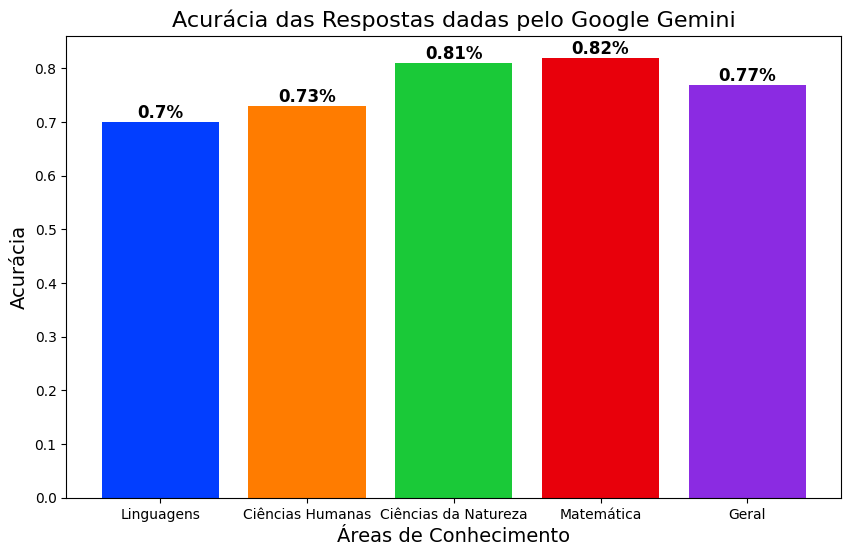

In [14]:
colors = sns.color_palette("bright")

areas = areas[0:4]
areas.append("Geral")

acc_geral = round((sum(acuracia_por_classe))/4, 2)
acuracia_por_classe.append(acc_geral)

plt.figure(figsize=(10, 6))
plt.bar(areas, acuracia_por_classe, color=colors[:5])

plt.title('Acurácia das Respostas dadas pelo Google Gemini', fontsize=16)
plt.xlabel('Áreas de Conhecimento', fontsize=14)
plt.ylabel('Acurácia', fontsize=14)

for i, count in enumerate(acuracia_por_classe):
    plt.text(i, count, str(count)+"%", ha='center', va="bottom" ,fontsize=12, fontweight = 'bold')

plt.show()


## Matriz de Confusão

A matriz de confusão é essencial para entender o que aconteceu com a API do gemini, e graças a ela, é notável a incerteza das questões de Linguagens e Ciências Humanas.

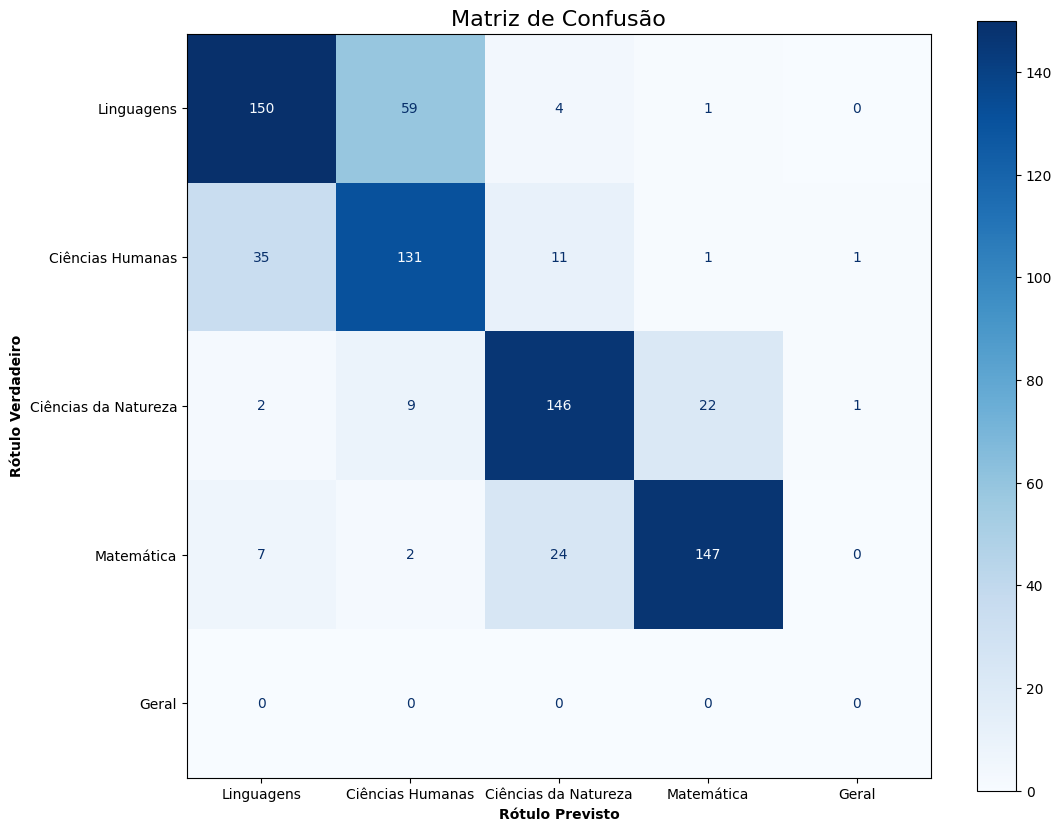

In [15]:
classe_real = []
classe_predita = []

for x in range(len(Valor_areas_real)):
    classe_real.append(Valor_areas_real[x])
    classe_predita.append(final_data_resultado[x])
    
assert isinstance(classe_real, (list, np.ndarray)), "classe_real deve ser uma lista ou array"
assert isinstance(classe_predita, (list, np.ndarray)), "classe_predita deve ser uma lista ou array"
assert len(classe_real) == len(classe_predita), "As listas devem ter o mesmo comprimento"

cm = confusion_matrix(classe_real, classe_predita, labels=range(len(areas)))

fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=areas)
disp.plot(cmap='Blues', ax=ax, values_format='d')

ax.set_xlabel('Rótulo Previsto', fontsize=10, fontweight='bold')
ax.set_ylabel('Rótulo Verdadeiro', fontsize=10, fontweight='bold')
plt.title('Matriz de Confusão', fontsize=16)
plt.show()
